# Stress Analysis in Social Media

Leverage the newly published and labelled reddit dataset for stress analysis to develop and improve supervised learning methods for identifying stress, both neural and traditional, and analyze the complexity and diversity of the data and characteristics of each category.

In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
import re
import string
import nltk
from nltk.corpus import stopwords
from nltk.corpus import RegexpTokenizer
from nltk.stem import WordNetLemmatizer
from nltk.stem.porter import PorterStemmer
from textblob import TextBlob

## EDA

In [2]:
path = '/Users/gillianchiang/Desktop/Insight/Project/Stress_Analysis/data/dreaddit/'
train = pd.read_csv(path + 'dreaddit-train.csv', encoding = "ISO-8859-1")
test = pd.read_csv(path + 'dreaddit-test.csv', encoding = "ISO-8859-1")

Number of train data 2838


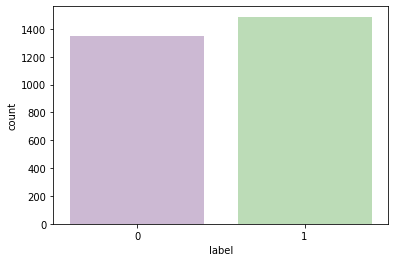

In [3]:
print('Number of train data', len(train))
sns.countplot('label', data = train, palette='PRGn')

Number of train data 715


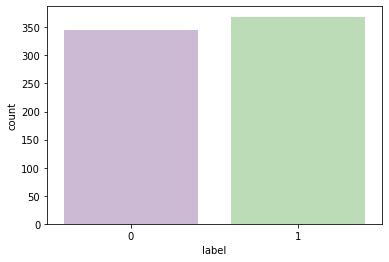

In [4]:
print('Number of train data', len(test))
sns.countplot('label', data = test, palette='PRGn')

When doing the presentation, can add a part of analyzing the text with lexicon-based tool such as textblob

## Data Preprocessing
Possible approach of data preprocessing and feature engineeing 
- Tokenization, Removal of punctuations.
- Removal of commonly used words (stopwords).
- Lemmatization or Stemming (Normalization)

### Tokenization & Remove punctuations

In [5]:
# tokenization: breaks the string into list of words
tokenizer = RegexpTokenizer(r'\w+')
train['text'] = train['text'].apply(lambda x: tokenizer.tokenize(x.lower()))

In [6]:
train['text']

0       [he, said, he, had, not, felt, that, way, befo...
1       [hey, there, r, assistance, not, sure, if, thi...
2       [my, mom, then, hit, me, with, the, newspaper,...
3       [until, i, met, my, new, boyfriend, he, is, am...
4       [october, is, domestic, violence, awareness, m...
                              ...                        
2833    [her, a, week, ago, precious, how, are, you, i...
2834    [i, don, t, have, the, ability, to, cope, with...
2835    [in, case, this, is, the, first, time, you, re...
2836    [do, you, find, this, normal, they, have, a, g...
2837    [i, was, talking, to, my, mom, this, morning, ...
Name: text, Length: 2838, dtype: object

### Remove Stopwords

In [7]:
# nltk.download('stopwords')

In [8]:
def remove_stopwords(text):
    words = [w for w in text if w not in stopwords.words('english')]
    return words

train['text'] = train['text'].apply(lambda x: remove_stopwords(x))

In [9]:
train['text']

0       [said, felt, way, suggeted, go, rest, trigger,...
1       [hey, r, assistance, sure, right, place, post,...
2       [mom, hit, newspaper, shocked, would, knows, l...
3       [met, new, boyfriend, amazing, kind, sweet, go...
4       [october, domestic, violence, awareness, month...
                              ...                        
2833    [week, ago, precious, ignored, jan, 1, happy, ...
2834    [ability, cope, anymore, trying, lot, things, ...
2835    [case, first, time, reading, post, looking, pe...
2836    [find, normal, good, relationship, main, probl...
2837    [talking, mom, morning, said, sister, trauma, ...
Name: text, Length: 2838, dtype: object

### Stemming & Lemmatization
Text normalization

In [10]:
# nltk.download('wordnet')

In [11]:
# stemming
stemmer = PorterStemmer()

def word_stemmer(text):
    stem_text = [stemmer.stem(i) for i in text]
    return stem_text

train['text'] = train['text'].apply(lambda x: word_stemmer(x))
train['text']

0       [said, felt, way, sugget, go, rest, trigger, a...
1       [hey, r, assist, sure, right, place, post, goe...
2       [mom, hit, newspap, shock, would, know, like, ...
3       [met, new, boyfriend, amaz, kind, sweet, good,...
4       [octob, domest, violenc, awar, month, domest, ...
                              ...                        
2833    [week, ago, preciou, ignor, jan, 1, happi, yea...
2834    [abil, cope, anymor, tri, lot, thing, trigger,...
2835    [case, first, time, read, post, look, peopl, w...
2836    [find, normal, good, relationship, main, probl...
2837    [talk, mom, morn, said, sister, trauma, wors, ...
Name: text, Length: 2838, dtype: object

In [ ]:
# lemmatization
# lemmatizer = WordNetLemmatizer()

# def word_lemmatizer(text):
#     lem_text = [lemmatizer.lemmatize(i) for i in text]
#     return lem_text

# train['text'] = train['text'].apply(lambda x: word_lemmatizer(x))
# train['text']

## Feature Extraction
- vectorization
- n-grams

## Classification